In [1]:
import numpy as np
import pandas as pd

In [ ]:
class KMeans():
    def __init__(self, k = 3, num_iter = 1000):
        """
            Some initializations, if neccesary
            
            Parameter:
                k: Number of clusters we are trying to classify
                num_iter: Number of iterations we are going to loop
        """
        
        self.model_name = 'KMeans'
        self.k = k
        self.num_iter = num_iter
        self.centers = None
        self.RM = None
        
    def train(self, X):
        """
            Train the given dataset
            
            Parameter:
                X: Matrix or 2-D array. Input feature matrix.
                
            Return:
                self: the whole model containing relevant information
        """
        
        r, c = X.shape
        centers = []
        RM = np.zeros((r, self.k))

        # Randomly choose initial centers
        initials = np.random.choice(r, self.k, replace=False)
        centers = X[initials, :]
        print(f'i = {initials}')
        print(f'c = {centers}')
        
        for i in range(self.num_iter):
            for j in range(r):
                distance = np.sum((centers - X[j, :])**2, axis=1)
                #print(f'd = {distance}')
                minpos = np.argmin(distance)
                temp_rm = np.zeros(self.k)
                temp_rm[minpos] = 1
                RM[j,:] = temp_rm
            new_centers = centers.copy()
            for l in range(self.k):
                row_index = (RM[:, l] == 1).flatten()
                all_l = X[row_index, :]
                if all_l.shape[0] > 0:
                    new_centers[l, :] = np.mean(all_l, axis=0)
                else:
                    new_centers[l, :] = centers[l, :]
            
            if np.sum(new_centers - centers) < 0.000000000000000000001:
                self.centers = new_centers
                self.RM = RM
                print('Converged')
                return self
            centers = new_centers
        self.centers = centers
        self.RM = RM
        return self

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
X = X[:,2:4]

In [5]:
clf = KMeans(k = 3)
model = clf.train(X)

i = [71 98 44]
c = [[4.  1.3]
 [3.  1.1]
 [1.9 0.4]]
Converged


(48, 2)
(52, 2)
(50, 2)


<ipython-input-6-6d53d20289ae>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  groups.append(X[index])


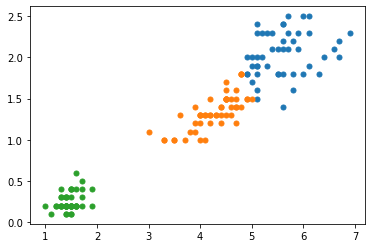

In [6]:
r, c = model.RM.shape
groups = []
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

In [7]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,[0,2]]

i = [ 83  55 136]
c = [[6.  5.1]
 [5.7 4.5]
 [6.3 5.6]]
Converged
(26, 2)
(88, 2)
(36, 2)


<ipython-input-8-477a0eb6ed9e>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  groups.append(X[index])


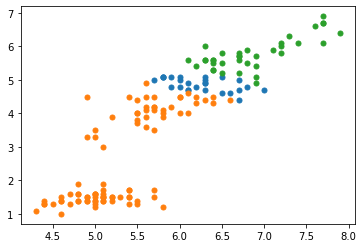

In [8]:
clf = KMeans(k = 3)
model = clf.train(X)
r, c = model.RM.shape
groups = []
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])
fig, ax = plt.subplots()
ax.margins(0.05)
for group in groups:
    print(group.shape)
    ax.plot(group[:,0], group[:,1], marker='o', linestyle='', ms=5)

## 3 dimension

In [9]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X[:,1:4]

In [10]:
clf = KMeans(k = 3)
model = clf.train(X)

i = [128  49  13]
c = [[2.8 5.6 2.1]
 [3.3 1.4 0.2]
 [3.  1.1 0.1]]
Converged


In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
groups = []
r, c = model.RM.shape
for i in range(c):
    index = [model.RM[:,i] == 1]
    groups.append(X[index])

<ipython-input-12-a3f097f95ec6>:5: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  groups.append(X[index])


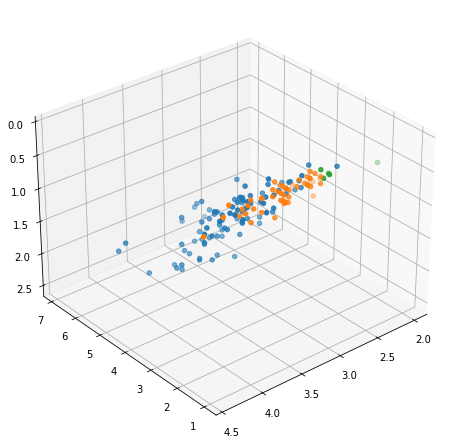

In [13]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
for group in groups:
    ax.scatter(group[:,0], group[:,1], group[:,2], marker='o')

Note: We should expect different results every time we run Kmeans as the centers are randomly initialized.

# Gaussian Mixture

Gaussian Mixture Algorithm is a softer version of the k-means algorithm. It is also a classic example of the Expectation-Maximization Algorithm. <br>
In Gaussian Mixture Algorithm, we model the data as coming from a mixture of Gaussians.<br>
In this example, we will be using a randomly generated Gaussian Distribution. <br>

In [14]:
from sklearn.cluster import KMeans

In [15]:
from sklearn.datasets import make_blobs

In [16]:
X, y = make_blobs(n_samples=500, n_features=3, cluster_std=2)

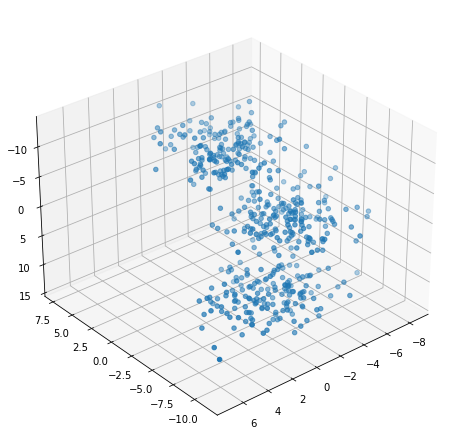

In [17]:
fig = plt.figure(figsize = (6, 6))
ax = Axes3D(fig, elev = -150, azim = 130)
ax.scatter(X[:,0], X[:,1], X[:,2], marker='o')

In [18]:
def gaussian(X, mu, cov):
    """ 
    Function to create mixtures using the given matrix X, given covariance and given mu
    
    Parameters:
        X: input data matrix
        mu: mean of the Gaussian
        cov: covariance of the Gaussian
    
    Return:
        transformed x
    """
    # X should be matrix-like
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)


In [19]:
def initialize_clusters(X, n_clusters):
    """ 
    Initialize the clusters by storing the information in the data matrix X into the clusters
    
    Parameters:
        X: input feature matrix
        n_clusters: number of clusters we are trying to classify
    
    Return:
        clusters: list of clusters. Each cluster center is calculated by the KMeans algorithm above.
    """
    clusters = []
    index = np.arange(X.shape[0])
    
    # We use the KMeans centroids to initialise the GMM
    
    kmeans = KMeans().fit(X)
    mu_k = kmeans.cluster_centers_
    
    for i in range(n_clusters):
        clusters.append({
            'w_k': 1.0 / n_clusters,
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters


In [20]:
cl = initialize_clusters(X, 3)
cl

[{'w_k': 0.3333333333333333,
  'mu_k': array([-3.8223778 , -6.69601217,  0.77031546]),
  'cov_k': array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]])},
 {'w_k': 0.3333333333333333,
  'mu_k': array([-1.25136516, -1.14080211, -9.25343412]),
  'cov_k': array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]])},
 {'w_k': 0.3333333333333333,
  'mu_k': array([-0.86040707, -4.69848958,  7.56215346]),
  'cov_k': array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]])}]

In [ ]:
def expectation_step(X, clusters):
    """ 
    "E-Step" for the Gaussian Mixture Model algorithm
    
    Parameters:
        X: input feature matrix
        clusters: list of clusters
    
    """
    totals = np.zeros((X.shape[0], 1), dtype=np.float64)
    
    for cluster in clusters:
        w_k = cluster['w_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        numerator = gaussian(X, mu_k, cov_k) * w_k
        denominator = np.sum([gaussian(X, cluster['mu_k'], cluster['cov_k']) * cluster['w_k'] for cluster in clusters])
        posterior = numerator / denominator
        
        totals += posterior
        cluster['posterior'] = posterior
        cluster['totals'] = totals
    
    for cluster in clusters:
        cluster['posterior'] /= cluster['totals']
    return clusters

In [ ]:
def maximization_step(X, clusters):
    """ 
    "M-Step" for the Gaussian Mixture Model algorithm
    
    Parameters:
        X: input feature matrix
        clusters: list of clusters
    
    """
    N = float(X.shape[0])
  
    for cluster in clusters:
        posterior = cluster['posterior']
        cov_k = np.zeros((X.shape[1], X.shape[1]))
             
        N_k = np.sum(posterior, axis=0)
        w_k = N_k / N
        mu_k = (1.0 / N_k) * np.sum(posterior * X, axis=0)
        
        for i in range(X.shape[0]):
            diff = (X[i] - mu_k).reshape(-1, 1)
            cov_k += posterior[i] * np.dot(diff, diff.T)
            
        cov_k /= N_k
        
        cluster['w_k'] = w_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [23]:
def get_likelihood(X, clusters):
    likelihood = []
    sample_likelihoods = np.log(np.array([cluster['totals'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

In [24]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))

    for i in range(n_epochs):
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood
        
    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['w_k']).reshape(-1)
        
    return clusters, likelihoods, scores, sample_likelihoods

In [25]:
clusters, likelihoods, scores, sample_likelihoods = train_gmm(X, 3, 100)

In [26]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, max_iter=50).fit(X)
gmm_scores = gmm.score_samples(X)

print('Means by sklearn:\n', gmm.means_)
print('Means by our implementation:\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))
print('Scores by sklearn:\n', gmm_scores[0:20])
print('Scores by our implementation:\n', sample_likelihoods.reshape(-1)[0:20])

Means by sklearn:
 [[-0.19911893 -6.64635553  8.95706663]
 [-1.71240172  0.6488957  -8.0690342 ]
 [-2.95524579 -4.95331967 -0.12273486]]
Means by our implementation:
 [[-0.19819162 -6.6470671   8.95963191]
 [-1.71202831  0.65111821 -8.07211279]
 [-2.95384159 -4.95139643 -0.12296956]]
Scores by sklearn:
 [ -7.00297726  -6.47275076  -7.15218323  -8.08920459  -6.900524
  -7.01048076  -6.00740033  -7.46677668 -11.58560303  -7.01413119
  -5.90926607  -6.20040129  -7.02894512  -9.56555589  -6.53624867
  -8.71744024  -6.84204804  -8.38575885  -6.29368461  -7.06210499]
Scores by our implementation:
 [ -6.29592259  -5.76147267  -6.44380759  -7.36964221  -6.19488113
  -6.30057346  -5.29712249  -6.75650666 -10.87594006  -6.30474179
  -5.20202048  -5.48947741  -6.31887448  -8.85851155  -5.82563096
  -8.00957313  -6.13127007  -7.67515563  -5.5826353   -6.3560665 ]
